# corner
- 정보량도 있지만
- 재현율도 있어야 함.(다양한 조명, 이미지가 이동, 변형되어도 똑같이 인식해야 함.)


> 재현
- 한 이미지에서 찾은 코너값을 다른 이미지에서 대응되는 값을 찾아야 함.
- 코너만으로는 다른 이미지에서의 같은 코너값을 찾을 수 없음 -> 주변값과 함께 봐야 함.
- 필터처럼 모든 점에 대하여 9개의 필터를 모두 고려하면 연산량이 엄청 커짐
- 코너점에 대해서만 주변 픽셀을 고려하여 실행하기


> 고려할 점
- 주변 몇 개를 볼 것인가?
- 사진이 축소(정보가 사라진 경우), 회전 되었을 때 문제.(이동만 된 경우는 문제 없음.)


> 고급 코너
- 픽셀 1개로 코너점을 표현하는 것이 아니라, 주변 픽셀을 연구하기 위해서 512byte 등으로 사용

> SIFT(Scale-Invariant Feature Transform)
- scale문제를 해결할 수 있는 알고리즘
- 느리지만 성능이 좋음. 유료
- opencv 3.4버전에서는 무료로 사용 가능
- 512byte

> ORB
- 무료. 빠름
- 32byte

> SURF
- 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    

## 1. ORB 사용

In [3]:
src = cv2.imread('./day6_rs/corner.png', 0)

In [4]:
orb = cv2.ORB_create()

# ORB는 한 코너점마다 32byte가 필요(영상의 코너점에 대한 주변 정보를 모두 포함하고 있음)
# 코너점이 픽셀 하나의 intencity가 아님

In [5]:
keypoints = orb.detect(src)

In [6]:
keypoints, desc = orb.compute(src, keypoints)
len(keypoints)

187

In [7]:
desc.shape

(187, 32)

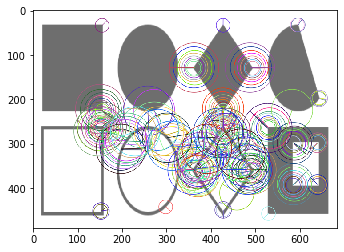

In [8]:
# 코너점 하나당 원 하나로 그려짐
# 32byte에는 주변 정보와 corner점에 대한 정보가 있음.
dst = cv2.drawKeypoints(src, 
                        keypoints, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst)

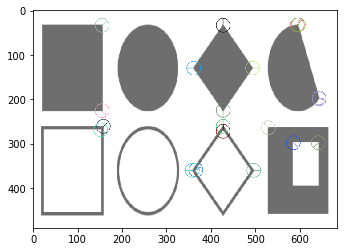

In [9]:
# corner점을 조금만 그리면

keypoints = keypoints[:20]
dst = cv2.drawKeypoints(src, 
                        keypoints, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst)

## 1.1. 다른 이미지에 연습

In [10]:
src = cv2.imread('./day6_rs/box_in_scene.png', 0)

In [11]:
orb = cv2.ORB_create()

# ORB는 한 코너점마다 32byte가 필요(영상의 코너점에 대한 주변 정보를 모두 포함하고 있음)
# 코너점이 픽셀 하나의 intencity가 아님

In [12]:
keypoints = orb.detect(src)

In [13]:
# keypoint: 원의 위치
# desc: descriptor: 주변정보를 32byte로 확장
keypoints, desc = orb.compute(src, keypoints)
len(keypoints)

500

In [14]:
desc.shape

# 500: 포인터 개수
# 32: 포인터 1개당 32byte(integer base)

(500, 32)

In [15]:
desc[0]

# 첫번째 점의 주변정보를 포함한 정보
# 이상적으로는 회전, scale 등 변형을 줘도 이 값은 항상 똑같이 나와야 함.

array([ 93,  89, 127, 161, 134,  90, 182, 224, 108,  96, 119, 162,  95,
        30, 163,  41,  51, 213, 164, 243,  85, 181,  45, 110, 254, 167,
        99,  71, 229,  59,  45,  71], dtype=uint8)

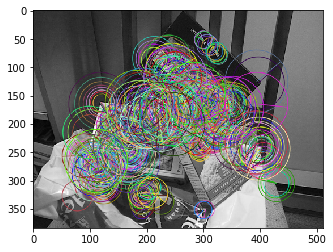

In [16]:
# 코너점 하나당 원 하나로 그려짐
# 32byte에는 주변 정보(원의 범위, 엦지 방향)와 corner점에 대한 정보가 있음.
dst = cv2.drawKeypoints(src, 
                        keypoints, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst)

# 2. 두 이미지에서 코너점 검출해서 비교해서 거리 재서 판단

## 2.1. 이미지에서 각각 코너점 찾기

In [17]:
src1 = cv2.imread('./day6_rs/box.png', 0)
src2 = cv2.imread('./day6_rs/box_in_scene.png', 0)

In [18]:
orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

In [19]:
desc1.shape, desc2.shape

# desc1: src1의 코너값: 453개
# desc2: src2의 코너값: 500개

((453, 32), (500, 32))

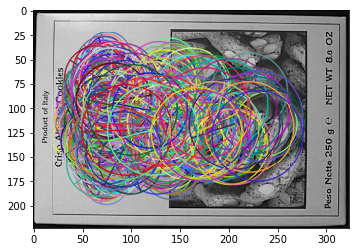

In [20]:
dst1 = cv2.drawKeypoints(src1, 
                        keypoints1, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst1)

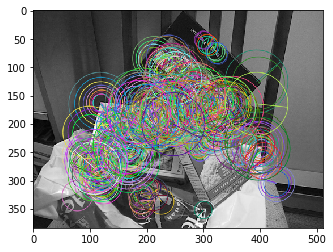

In [21]:
dst2 = cv2.drawKeypoints(src2, 
                        keypoints2, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst2)

#### 171번째 점끼리 비교 
- 값이 매우 다르므로, 전혀 매칭되는 값이 아님

In [22]:
keypoints1[171].pt  # 좌표

(56.400001525878906, 134.40000915527344)

In [23]:
desc1[171]  # 32byte 정보 확인

array([103, 153, 226,  94, 193, 208,  86, 176, 121,  66, 254,  18, 106,
       254,  46, 116,  93, 250, 182, 194, 221,  47, 246, 227,  19,  62,
       144,  75, 127, 173, 248,  70], dtype=uint8)

In [24]:
keypoints2[171].pt

(121.20000457763672, 297.6000061035156)

In [25]:
desc2[171]

array([169,  30,  14,  49, 184, 251, 145, 119, 188, 239, 246, 253, 159,
         6, 130, 153, 206,  34, 206,  52, 189, 207,  97,  12, 236, 195,
       122, 209, 202,  76, 175, 217], dtype=uint8)

## 2.2 같은 점끼리 매칭되는 점 찾기

#### 거리 재는 방법
- 유클리디안 : 피타고라스
- 멘하단: 멘하탄 블록 방법
- 해밍 : 고속으로 거리는 재는 방법, 2진수에서 거리를 재는 방법


> 1차원에서는
- 유클리디안 거리 = 멘하탄 : 7과 3의 거리: 4
- 헤밍: 7 = 111(2진수), 3 = 11(2진수) ->부호 비트가 같은지 다른지만 따짐
- 111(2)
- 011(2)
- 100(같으면 0, 다르면 1) -> 비트 정보량이 같은지 다른지만 비교하기

> 헤밍 distance
- 얼마나 다른지 빠르게 비교
- 비트 연산만 하면 됨(고속 연산이므로)
- 제곱, 루트 연산 할 필요 없음.
- 32byte를 쭉 늘어놓고 비트별로 같은지 다른지반 비교


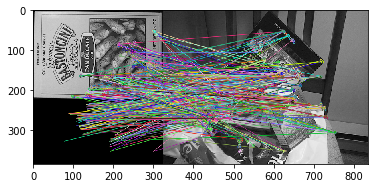

True

In [26]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
# 몇번재 몇번째가 매칭되는지 정보가 저장
matches = matcher.match(desc1, desc2)

des = cv2.drawMatches(src1, keypoints, src2, keypoints2, matches, None)

imshow('', des)

cv2.imwrite('orb.png', dst)

In [27]:
type(matches)

list

### matching 여부 확인

In [28]:
len(matches)

453

In [29]:
matches[0]

# 매칭 청보를 담고있는 class

<DMatch 00000287BCD92850>

In [30]:
# 첫번째 이미지의 index
matches[0].queryIdx

0

In [31]:
# 두 번째 이미지에서의 idx
matches[0].trainIdx

487

In [32]:
matches[0].distance

# 이상적으로는 0이 나와야 하지만, 가장 가까운 점을 찾음.

86.0

In [33]:
for m in matches:
    print(f"{m.queryIdx} - {m.trainIdx} ,  {m.distance}")
#     print(f"{m.queryIdx - m.trainIdx /  m.distance}")


0 - 487 ,  86.0
1 - 304 ,  73.0
2 - 378 ,  77.0
3 - 326 ,  87.0
4 - 126 ,  82.0
5 - 318 ,  77.0
6 - 65 ,  82.0
7 - 90 ,  66.0
8 - 474 ,  73.0
9 - 96 ,  76.0
10 - 163 ,  81.0
11 - 488 ,  76.0
12 - 449 ,  74.0
13 - 149 ,  74.0
14 - 20 ,  80.0
15 - 445 ,  82.0
16 - 120 ,  85.0
17 - 238 ,  71.0
18 - 99 ,  86.0
19 - 167 ,  70.0
20 - 318 ,  82.0
21 - 269 ,  84.0
22 - 352 ,  74.0
23 - 429 ,  70.0
24 - 68 ,  81.0
25 - 370 ,  84.0
26 - 54 ,  57.0
27 - 67 ,  79.0
28 - 377 ,  66.0
29 - 279 ,  83.0
30 - 477 ,  72.0
31 - 388 ,  75.0
32 - 99 ,  84.0
33 - 473 ,  72.0
34 - 241 ,  78.0
35 - 486 ,  70.0
36 - 314 ,  79.0
37 - 455 ,  78.0
38 - 146 ,  71.0
39 - 348 ,  81.0
40 - 189 ,  68.0
41 - 485 ,  60.0
42 - 287 ,  81.0
43 - 462 ,  65.0
44 - 105 ,  83.0
45 - 499 ,  76.0
46 - 282 ,  84.0
47 - 184 ,  79.0
48 - 250 ,  82.0
49 - 60 ,  69.0
50 - 203 ,  76.0
51 - 91 ,  79.0
52 - 295 ,  77.0
53 - 68 ,  78.0
54 - 124 ,  83.0
55 - 499 ,  79.0
56 - 390 ,  67.0
57 - 434 ,  78.0
58 - 99 ,  81.0
59 - 87 ,  77.0
60 -

#### 두 이미지의 매칭되는 좌표 출력

In [34]:
# 첫번째 이미지에서의 0번째 점과 매칭되는 물리적인 좌표
keypoints1[matches[0].queryIdx].pt

(83.0, 78.0)

In [35]:
# 두번째 이미지에서의 0번째 점과 매칭되는 물리적인 좌표
keypoints2[matches[0].trainIdx].pt

(343.9854736328125, 186.32545471191406)

## 2.3. 거리가 가까운 점들만 고르기

In [36]:
# distance를 기준으로 정렬
matches = sorted(matches, key = lambda x: x.distance)
good_matches = matches[:20]

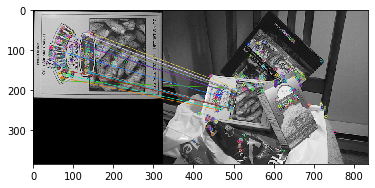

In [38]:
dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches,  None)

imshow('', dst2)


# 3. book 이미지 연습

## 3.1. 이미지에서 각각 코너점 찾기

In [39]:
src1 = cv2.imread('./day6_rs/book3.jpg', 0)
src2 = cv2.imread('./day6_rs/book3_1.jpg', 0)

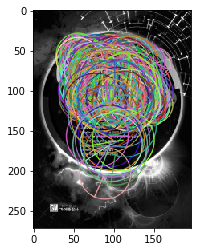

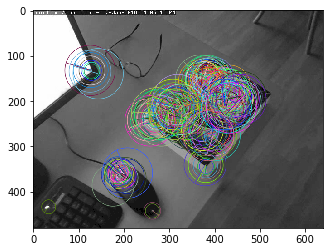

In [40]:
orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

desc1.shape, desc2.shape

# desc1: src1의 코너값: 453개
# desc2: src2의 코너값: 500개

dst1 = cv2.drawKeypoints(src1, 
                        keypoints1, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst1)

dst2 = cv2.drawKeypoints(src2, 
                        keypoints2, 
                        None, 
                        (-1,-1,-1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
                       )

imshow('', dst2)

## 3.2 같은 점끼리 매칭되는 점 찾기

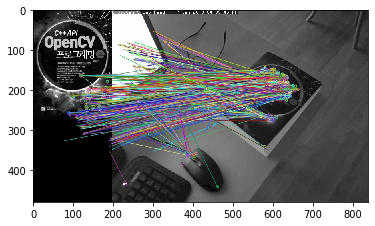

True

In [41]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
# 몇번재 몇번째가 매칭되는지 정보가 저장
matches = matcher.match(desc1, desc2)

des = cv2.drawMatches(src1, keypoints, src2, keypoints2, matches, None)

imshow('', des)

cv2.imwrite('orb.png', dst)

In [42]:
for m in matches:
    print(f"{m.queryIdx} - {m.trainIdx} ,  {m.distance}")
#     print(f"{m.queryIdx - m.trainIdx /  m.distance}")


0 - 170 ,  62.0
1 - 433 ,  69.0
2 - 492 ,  66.0
3 - 471 ,  73.0
4 - 466 ,  82.0
5 - 378 ,  73.0
6 - 415 ,  56.0
7 - 192 ,  88.0
8 - 16 ,  65.0
9 - 424 ,  86.0
10 - 90 ,  73.0
11 - 446 ,  83.0
12 - 413 ,  70.0
13 - 346 ,  86.0
14 - 465 ,  80.0
15 - 230 ,  86.0
16 - 30 ,  54.0
17 - 86 ,  75.0
18 - 90 ,  68.0
19 - 345 ,  70.0
20 - 51 ,  82.0
21 - 321 ,  61.0
22 - 236 ,  71.0
23 - 190 ,  82.0
24 - 456 ,  70.0
25 - 46 ,  75.0
26 - 136 ,  85.0
27 - 486 ,  77.0
28 - 483 ,  67.0
29 - 328 ,  73.0
30 - 430 ,  80.0
31 - 39 ,  68.0
32 - 136 ,  80.0
33 - 21 ,  59.0
34 - 266 ,  69.0
35 - 472 ,  73.0
36 - 7 ,  71.0
37 - 7 ,  63.0
38 - 411 ,  78.0
39 - 345 ,  72.0
40 - 405 ,  72.0
41 - 456 ,  70.0
42 - 107 ,  78.0
43 - 427 ,  66.0
44 - 485 ,  62.0
45 - 22 ,  58.0
46 - 82 ,  79.0
47 - 208 ,  63.0
48 - 217 ,  80.0
49 - 16 ,  70.0
50 - 368 ,  58.0
51 - 288 ,  90.0
52 - 111 ,  87.0
53 - 475 ,  62.0
54 - 452 ,  63.0
55 - 475 ,  59.0
56 - 440 ,  58.0
57 - 427 ,  63.0
58 - 45 ,  71.0
59 - 460 ,  65.0
60 - 41

## 3.3. 거리가 가까운 점들만 고르기

In [43]:
# distance를 기준으로 정렬
matches = sorted(matches, key = lambda x: x.distance)
good_matches = matches[:20]

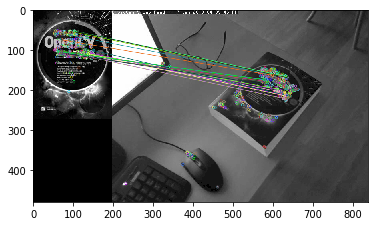

In [44]:
dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches,  None)

imshow('', dst2)


- 잘 매칭되면 선이 꼬이지 않음

# 4.코너점 응용
- 파노라마
- 물체 detection
- 로그 인식
- 물체 tracking
- 얼굴 인식
- 증강 현실

# 5. 스티처(=파노라마): cv2.Stitcher_create()

In [45]:
files = ['img1.jpg','img2.jpg','img3.jpg']

imgs = []

for i in files:
    img = cv2.imread('./day6_rs/'+ i, 1)
    imgs.append(img)
    

In [ ]:
stitcher = cv2.Stitcher_create()
status, dst = stitcher.stitch(imgs)


In [ ]:
imshow('dis', dst)